In [78]:
import input as i
import alg as a
import alg_google as a_g
import numpy as np
from importlib import reload
reload(i); reload(a);
import matplotlib.pyplot as plt
import pandas as pd
import time

# Quick Test: DPOA($\omega$)
A random instance with $D \in [0,100], B = 60$ with perfect predictor, $\omega = 0.1$.

In [79]:
w = .1

ins = i.Instance(w, B=60, predictor_std=0) # a random instant D
print("D = ", ins.D, " B = ", ins.B)
alg = a.DPOA(ins, w)
opt = a.OPT(ins)
print("{0:.3f}-consistant".format(alg/opt))

D =  6  B =  60
1.000-consistant


# Experiment 1: DPOA($\omega$)
$\omega = 0, 0.1,0.2,..., 1$; each scenario repeated multiple times; $B = 50$.

In [80]:
reload(a); reload(i)
w_list = np.arange(0,1.1,.1)
repeat = 100
c_ratio = np.zeros((len(w_list), repeat))
for idx,w in enumerate(w_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50)
        alg = a.DPOA(ins, w)
        opt = a.OPT(ins)
        c_ratio[idx, j] = alg/opt
        


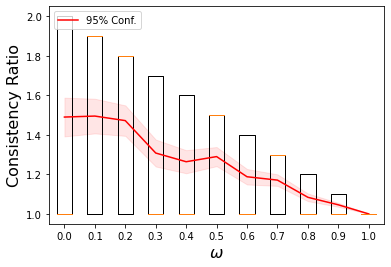

In [81]:
avg_ratio = np.mean(c_ratio, axis=1)
ci = 1.96 * np.std(c_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Consistency Ratio", fontsize=16)

plt.boxplot(c_ratio.transpose());
positions = np.arange(1, len(w_list)+1)

plt.plot(positions, avg_ratio, label="95% Conf.", color='r')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)


formated_list = ['%.1f' % elem for elem in w_list ]
plt.xticks(positions, formated_list);

plt.legend(loc='upper left')

### Time-deminishing Noisy Predictor 

In [122]:
reload(a); reload(i)
w_list = np.arange(0,1.1,.1)
repeat = 1000
c2_ratio = np.zeros((len(w_list), repeat))
for idx,w in enumerate(w_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50, time_dependant=True)
        alg = a.DPOA(ins, w)
        opt = a.OPT(ins)
        c2_ratio[idx, j] = alg/opt
        


<ipython-input-125-45fa195b9939>:9: RuntimeWarning: divide by zero encountered in double_scalars
  robust_ratio = [(2-w)/(1-w) for w in w_list]


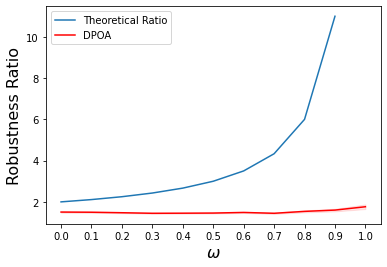

In [125]:
avg_ratio = np.mean(c2_ratio, axis=1)
ci = 1.96 * np.std(c2_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Robustness Ratio", fontsize=16)


robust_ratio = [(2-w)/(1-w) for w in w_list]
positions = np.arange(1, len(w_list)+1)

plt.plot(positions, robust_ratio, label= "Theoretical Ratio")
plt.plot(positions, avg_ratio, label="DPOA", color='r')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)


formated_list = ['%.1f' % elem for elem in w_list ]
plt.xticks(positions, formated_list);

plt.legend(loc='upper left')

### Time Invariant Predictor
$\sigma \in [0,2\times B]$ 

In [13]:
reload(a); reload(i)
w = 0.1
std_list = np.arange(0,100,10)
repeat = 1000
r_ratio = np.zeros((len(std_list), repeat))
for idx,std in enumerate(std_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50, predictor_std=std)
        alg = a.DPOA(ins, w)
        opt = a.OPT(ins)
        r_ratio[idx, j] = alg/opt

[1.4293     1.49447103 1.51345019 1.48391425 1.50396156 1.47568209
 1.48722104 1.46300539 1.49284947 1.51329692]


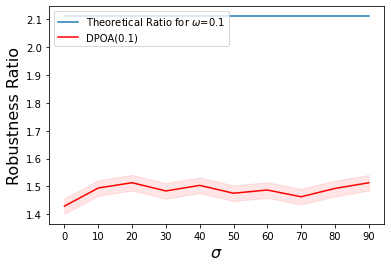

In [16]:
avg_ratio = np.mean(r_ratio, axis=1)
print(avg_ratio)
ci = 1.96 * np.std(r_ratio,axis=1)/np.sqrt(repeat)


plt.clf()
plt.xlabel("$\sigma$", fontsize=16)
plt.ylabel("Robustness Ratio", fontsize=16)

# plt.boxplot(r_ratio.transpose());
ratio_theory = (2-w)/ (1-w)
plt.plot([1, len(std_list)], [ratio_theory, ratio_theory], label = "Theoretical Ratio for $\omega$=%.1f"%w)
positions = np.arange(1, len(std_list)+1)

plt.plot(positions, avg_ratio, label="DPOA(%.1f)"%w, color='r')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)


formated_list = [elem for elem in std_list ]
plt.xticks(positions, formated_list);
plt.legend(loc='upper left')


# Experiment 2: RPOA($\omega$)

In [82]:
reload(a); reload(i)
w_list = np.arange(0,1,.1)
repeat = 50
alg_reps = 50
c_ratio = np.zeros((len(w_list), repeat))
for idx,w in enumerate(w_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50)
        alg_total = 0
        for l in range(alg_reps):
            alg_total += a.RPOA(ins, w)
        opt = a.OPT(ins)
        alg_avg = alg_total/alg_reps
        c_ratio[idx, j] = alg_avg/opt

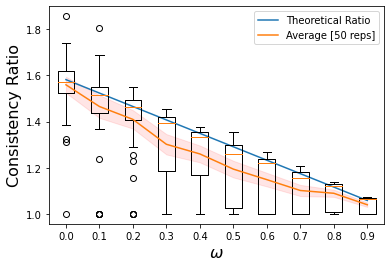

In [83]:
avg_ratio = np.mean(c_ratio, axis=1)
ci = 1.96 * np.std(c_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Consistency Ratio", fontsize=16)
plt.plot([1, 10], [(np.exp(1)-0)/(np.exp(1) - 1), (np.exp(1)-.9)/(np.exp(1) - 1)  ], label= "Theoretical Ratio")
plt.boxplot(c_ratio.transpose());
positions = np.arange(1, len(w_list)+1)
plt.plot(positions, avg_ratio, label = "Average [%d reps]"%alg_reps)
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)

formated_list = ['%.1f' % elem for elem in w_list ]
plt.xticks(positions, formated_list);
plt.legend()



### Time-deminishing predictor

In [118]:
w_list = np.arange(0,1,.1)
repeat = 50
alg_reps = 50
c_ratio = np.zeros((len(w_list), repeat))
for idx,w in enumerate(w_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50, time_dependant=True)
        alg_total = 0
        for l in range(alg_reps):
            alg_total += a.RPOA(ins, w)
        opt = a.OPT(ins)
        alg_avg = alg_total/alg_reps
        c_ratio[idx, j] = alg_avg/opt
        



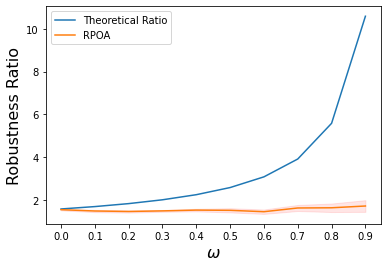

In [121]:
        
avg_ratio = np.mean(c_ratio, axis=1)
ci = 1.96 * np.std(c_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Robustness Ratio", fontsize=16)

robust_ratio = [(np.exp(1)-w)/((np.exp(1)-1)*(1-w)) for w in w_list]
positions = np.arange(1, len(w_list)+1)

plt.plot(positions, robust_ratio, label= "Theoretical Ratio")
plt.plot(positions, avg_ratio, label = "RPOA")
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)

formated_list = ['%.1f' % elem for elem in w_list ]
plt.xticks(positions, formated_list);
plt.legend()

### Time-invariant Noisy Predictor 
$\sigma \in [0,10, 2\times B]$ 

In [15]:
w = 0.3
std_list = np.arange(0,100,10)
repeat = 50
alg_reps = 1000
r_ratio = np.zeros((len(std_list), repeat))
for idx,std in enumerate(std_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=50, predictor_std=std)
        alg_total = 0
        for l in range(alg_reps):
            alg_total += a.RPOA(ins, w)
        alg_avg = alg_total/alg_reps
        opt = a.OPT(ins)
        r_ratio[idx, j] = alg_avg/opt

[1.29640507 1.52270274 1.52714365 1.5763445  1.55262845 1.59056987
 1.66150531 1.60236463 1.53322645 1.55609905]
[0.04525667 0.07380414 0.05345063 0.05936001 0.0559097  0.06938443
 0.0637513  0.06060975 0.06260227 0.05142393]


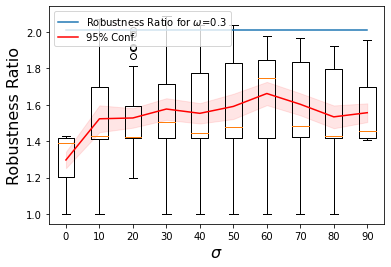

In [16]:
avg_ratio = np.mean(r_ratio, axis=1)
print(avg_ratio)
ci = 1.96 * np.std(r_ratio,axis=1)/np.sqrt(repeat)
print(ci)


plt.clf()
plt.xlabel("$\sigma$", fontsize=16)
plt.ylabel("Robustness Ratio", fontsize=16)

plt.boxplot(r_ratio.transpose());
ratio_theory = (np.exp(1)-w)/ ((np.exp(1)-1) * (1-w) )
plt.plot([1, 10], [ratio_theory, ratio_theory], label = "Robustness Ratio for $\omega$=%.1f"%w)
positions = np.arange(1, len(std_list)+1)

plt.plot(positions, avg_ratio, label="95% Conf.", color='r')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='r', alpha=.1)


formated_list = [elem for elem in std_list ]
plt.xticks(positions, formated_list);
plt.legend(loc='upper left')

# Experiment 3: OLPA
For different values of $k$

In [269]:
reload(i); reload(a)
B = .25
epsilon = .05
std = 3
repeat = 20

theta = 2 * np.log(12 * B ** 2 / epsilon)
K = int(np.ceil(12 * B ** 2 * theta / epsilon**2))
print("Theoretical bound: k >=", K)

K = 1000
k_list = np.linspace(100,K,20, dtype=int)



w_vals = np.zeros((len(k_list), repeat))
min_vals = np.zeros((len(k_list), repeat))

t1 = time.time()
t_ = t1
for idx,k in enumerate(k_list):
    print("🔴 k = %-7d 🕑 %-4.2fs      +%-4.2fs"%(k, time.time()-t1, time.time()-t_))
    t_ = time.time()
    for j in np.arange(repeat):
        m_ins = i.MultiInstance(K=k,B=25, normalize=True, predictor_std=std)  
        wind, min_R = a.OLPA(m_ins, W=10, e=epsilon)
        w_vals[idx, j] = wind
        min_vals[idx, j] = min_R
        print(" ↳rep %2d: olpa = %-3.2f  | min = %3.2f "%(j, wind, min_R))
    
print("Completed in %-4.2fs "%(time.time()-t1))

Theoretical bound: k >= 1625
🔴 k = 100     🕑 0.00s      +0.00s
 ↳rep  0: olpa = 0.32  | min = 0.25 
 ↳rep  1: olpa = 0.33  | min = 0.25 
 ↳rep  2: olpa = 0.32  | min = 0.26 
 ↳rep  3: olpa = 0.31  | min = 0.25 
 ↳rep  4: olpa = 0.33  | min = 0.26 
 ↳rep  5: olpa = 0.30  | min = 0.25 
 ↳rep  6: olpa = 0.32  | min = 0.25 
 ↳rep  7: olpa = 0.32  | min = 0.25 
 ↳rep  8: olpa = 0.31  | min = 0.25 
 ↳rep  9: olpa = 0.32  | min = 0.26 
 ↳rep 10: olpa = 0.32  | min = 0.25 
 ↳rep 11: olpa = 0.30  | min = 0.25 
 ↳rep 12: olpa = 0.31  | min = 0.24 
 ↳rep 13: olpa = 0.32  | min = 0.25 
 ↳rep 14: olpa = 0.33  | min = 0.26 
 ↳rep 15: olpa = 0.31  | min = 0.24 
 ↳rep 16: olpa = 0.31  | min = 0.26 
 ↳rep 17: olpa = 0.33  | min = 0.25 
 ↳rep 18: olpa = 0.31  | min = 0.26 
 ↳rep 19: olpa = 0.31  | min = 0.24 
🔴 k = 147     🕑 1.96s      +1.96s
 ↳rep  0: olpa = 0.32  | min = 0.25 
 ↳rep  1: olpa = 0.31  | min = 0.25 
 ↳rep  2: olpa = 0.30  | min = 0.25 
 ↳rep  3: olpa = 0.32  | min = 0.25 
 ↳rep  4: olpa 

 ↳rep 10: olpa = 0.28  | min = 0.25 
 ↳rep 11: olpa = 0.28  | min = 0.25 
 ↳rep 12: olpa = 0.28  | min = 0.25 
 ↳rep 13: olpa = 0.28  | min = 0.25 
 ↳rep 14: olpa = 0.29  | min = 0.25 
 ↳rep 15: olpa = 0.29  | min = 0.25 
 ↳rep 16: olpa = 0.29  | min = 0.25 
 ↳rep 17: olpa = 0.28  | min = 0.25 
 ↳rep 18: olpa = 0.29  | min = 0.24 
 ↳rep 19: olpa = 0.29  | min = 0.25 
🔴 k = 621     🕑 70.45s      +10.93s
 ↳rep  0: olpa = 0.28  | min = 0.25 
 ↳rep  1: olpa = 0.28  | min = 0.25 
 ↳rep  2: olpa = 0.29  | min = 0.25 
 ↳rep  3: olpa = 0.28  | min = 0.25 
 ↳rep  4: olpa = 0.28  | min = 0.25 
 ↳rep  5: olpa = 0.29  | min = 0.25 
 ↳rep  6: olpa = 0.28  | min = 0.25 
 ↳rep  7: olpa = 0.28  | min = 0.25 
 ↳rep  8: olpa = 0.29  | min = 0.25 
 ↳rep  9: olpa = 0.29  | min = 0.26 
 ↳rep 10: olpa = 0.29  | min = 0.25 
 ↳rep 11: olpa = 0.28  | min = 0.25 
 ↳rep 12: olpa = 0.29  | min = 0.25 
 ↳rep 13: olpa = 0.28  | min = 0.25 
 ↳rep 14: olpa = 0.28  | min = 0.25 
 ↳rep 15: olpa = 0.28  | min = 0.25 
 ↳

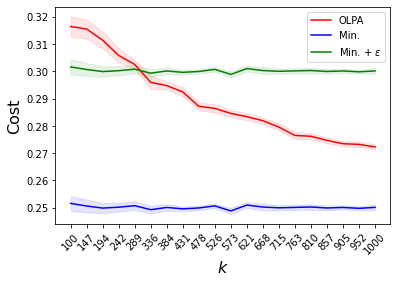

In [271]:
avg_w = np.mean(w_vals, axis=1)
avg_min = np.mean(min_vals, axis=1)
ci_w = 1.96 * np.std(w_vals,axis=1)/np.sqrt(repeat)
ci_min = 1.96 * np.std(min_vals,axis=1)/np.sqrt(repeat)



plt.clf()
plt.xlabel("$k$", fontsize=16)
plt.ylabel("Cost", fontsize=16)

# plt.boxplot(r_ratio.transpose());

positions = np.arange(1, len(k_list)+1)

plt.plot(positions, avg_w, label="OLPA", color='r')
plt.fill_between(positions, (avg_w-ci_w), (avg_w+ci_w), color='r', alpha=.1)

plt.plot(positions, avg_min, label="Min.", color='b')
plt.fill_between(positions, (avg_min-ci_min), (avg_min+ci_min), color='b', alpha=.1)

plt.plot(positions, avg_min + epsilon, label="Min. + $\epsilon$", color='g')
plt.fill_between(positions, (avg_min+epsilon-ci_min), (avg_min+epsilon+ci_min), color='g', alpha=.1)

formated_list = [elem for elem in k_list ]
plt.xticks(positions, formated_list);
plt.legend(loc='upper right')
plt.xticks(rotation=45);

# Experiment 4: MOLPA


In [43]:
reload(i); reload(a)
epsilon = .05
# B = .5
# theta = 2 * np.log(12 * B ** 2 / epsilon)
# K = int(np.ceil(12 * B ** 2 * theta / epsilon**2))
# print("Theoretical bound: k >=", K)
K = 1000
S = 5
repeat = 30

k_list = np.linspace(100,K,10, dtype=int)


sol_vals = np.zeros((len(k_list), repeat))
min_vals = np.zeros((len(k_list), repeat))

t1 = time.time()
t_ = t1
for idx,k in enumerate(k_list):
    print("🔴 k = %-7d 🕑 %-4.2fs      +%-4.2fs"%(k, time.time()-t1, time.time()-t_))
    t_ = time.time()
    for j in np.arange(repeat):
        p_ins = i.MultiPredictInstance(K=k, S=S, w=w, normalize=True)  
        wind, min_R = a.MOLPA(p_ins, W=10, e=epsilon)
        sol_vals[idx, j] = wind
        min_vals[idx, j] = min_R
        print(" ↳rep %2d: molpa = %-3.2f  | min = %3.2f "%(j, wind, min_R))
    
print("Completed in %-4.2fs "%(time.time()-t1))

🔴 k = 100     🕑 0.00s      +0.00s
 ↳rep  0: molpa = 0.51  | min = 0.50 
 ↳rep  1: molpa = 0.55  | min = 0.50 
 ↳rep  2: molpa = 0.57  | min = 0.50 
 ↳rep  3: molpa = 0.51  | min = 0.51 
 ↳rep  4: molpa = 0.62  | min = 0.50 
 ↳rep  5: molpa = 0.58  | min = 0.49 
 ↳rep  6: molpa = 0.55  | min = 0.51 
 ↳rep  7: molpa = 0.54  | min = 0.49 
 ↳rep  8: molpa = 0.59  | min = 0.50 
 ↳rep  9: molpa = 0.54  | min = 0.50 
 ↳rep 10: molpa = 0.55  | min = 0.51 
 ↳rep 11: molpa = 0.61  | min = 0.50 
 ↳rep 12: molpa = 0.57  | min = 0.50 
 ↳rep 13: molpa = 0.58  | min = 0.50 
 ↳rep 14: molpa = 0.53  | min = 0.51 
 ↳rep 15: molpa = 0.54  | min = 0.50 
 ↳rep 16: molpa = 0.54  | min = 0.51 
 ↳rep 17: molpa = 0.58  | min = 0.50 
 ↳rep 18: molpa = 0.58  | min = 0.50 
 ↳rep 19: molpa = 0.57  | min = 0.51 
 ↳rep 20: molpa = 0.50  | min = 0.51 
 ↳rep 21: molpa = 0.59  | min = 0.51 
 ↳rep 22: molpa = 0.56  | min = 0.51 
 ↳rep 23: molpa = 0.51  | min = 0.50 
 ↳rep 24: molpa = 0.58  | min = 0.50 
 ↳rep 25: molpa 

 ↳rep 29: molpa = 0.55  | min = 0.50 
🔴 k = 800     🕑 504.43s      +125.49s
 ↳rep  0: molpa = 0.57  | min = 0.50 
 ↳rep  1: molpa = 0.55  | min = 0.50 
 ↳rep  2: molpa = 0.55  | min = 0.50 
 ↳rep  3: molpa = 0.55  | min = 0.50 
 ↳rep  4: molpa = 0.55  | min = 0.50 
 ↳rep  5: molpa = 0.54  | min = 0.50 
 ↳rep  6: molpa = 0.56  | min = 0.50 
 ↳rep  7: molpa = 0.55  | min = 0.50 
 ↳rep  8: molpa = 0.53  | min = 0.50 
 ↳rep  9: molpa = 0.55  | min = 0.50 
 ↳rep 10: molpa = 0.56  | min = 0.50 
 ↳rep 11: molpa = 0.55  | min = 0.50 
 ↳rep 12: molpa = 0.55  | min = 0.50 
 ↳rep 13: molpa = 0.54  | min = 0.50 
 ↳rep 14: molpa = 0.56  | min = 0.50 
 ↳rep 15: molpa = 0.53  | min = 0.50 
 ↳rep 16: molpa = 0.55  | min = 0.50 
 ↳rep 17: molpa = 0.57  | min = 0.50 
 ↳rep 18: molpa = 0.53  | min = 0.50 
 ↳rep 19: molpa = 0.57  | min = 0.50 
 ↳rep 20: molpa = 0.54  | min = 0.50 
 ↳rep 21: molpa = 0.55  | min = 0.50 
 ↳rep 22: molpa = 0.54  | min = 0.50 
 ↳rep 23: molpa = 0.53  | min = 0.50 
 ↳rep 24: mo

In [5]:
# np.savez("data/molpa_alg=dpoa_S=5sol_vals10,5000,20",sol_vals = sol_vals, min_vals = min_vals)

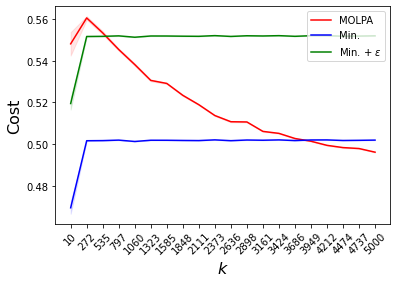

In [41]:
avg_sol = np.mean(sol_vals, axis=1)
avg_min = np.mean(min_vals, axis=1)
ci_sol = 1.96 * np.std(sol_vals,axis=1)/np.sqrt(repeat)
ci_min = 1.96 * np.std(min_vals,axis=1)/np.sqrt(repeat)



plt.clf()
plt.xlabel("$k$", fontsize=16)
plt.ylabel("Cost", fontsize=16)

# plt.boxplot(r_ratio.transpose());

positions = np.arange(1, len(k_list)+1)

plt.plot(positions, avg_sol, label="MOLPA", color='r')
plt.fill_between(positions, (avg_sol-ci_sol), (avg_sol+ci_sol), color='r', alpha=.1)

plt.plot(positions, avg_min, label="Min.", color='b')
plt.fill_between(positions, (avg_min-ci_min), (avg_min+ci_min), color='b', alpha=.1)

plt.plot(positions, avg_min + epsilon, label="Min. + $\epsilon$", color='g')
plt.fill_between(positions, (avg_min+epsilon-ci_min), (avg_min+epsilon+ci_min), color='g', alpha=.1)

formated_list = [elem for elem in k_list ]
plt.xticks(positions, formated_list);
plt.legend(loc='upper right')
plt.xticks(rotation=45);

# Experiment 5: Comparison with Google

In [378]:
reload(a); reload(a_g); reload(i)
B = 10
w_list = np.linspace(0,0.8,10)
print(w_list)
repeat = 5000
std = 50

alg_ratio = np.zeros((len(w_list), repeat))
rand_ratio = np.zeros((len(w_list), repeat))
google_ratio = np.zeros((len(w_list), repeat))
google_r_ratio = np.zeros((len(w_list), repeat))

for idx,w in enumerate(w_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=B, time_dependant=True, predictor_std= std)
        alg = a.DPOA(ins, w=w)
        rand = a.RPOA(ins, w=w)
        google =a_g.DPOA_google(ins,w)
        g_rand = a_g.RPOA_google(ins,w)
        opt = a.OPT(ins)
        
        alg_ratio[idx, j] = alg/opt
        rand_ratio[idx,j] = rand/opt
        google_ratio[idx, j] = google/opt
        google_r_ratio[idx, j] = g_rand/opt
        
        


[0.         0.08888889 0.17777778 0.26666667 0.35555556 0.44444444
 0.53333333 0.62222222 0.71111111 0.8       ]


Text(0, 0.5, 'Competitive Ratio')

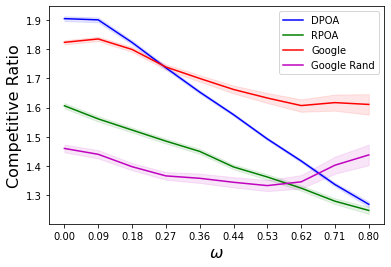

In [379]:
avg_ratio = np.mean(alg_ratio, axis=1)
ci = 1.96 * np.std(alg_ratio,axis=1)/np.sqrt(repeat)
avg_r_ratio = np.mean(rand_ratio, axis=1)
ci_r = 1.96 * np.std(rand_ratio,axis=1)/np.sqrt(repeat)
avg_ratio_g = np.mean(google_ratio, axis=1)
ci_g = 1.96 * np.std(google_ratio,axis=1)/np.sqrt(repeat)
avg_ratio_gr = np.mean(google_r_ratio, axis=1)
ci_gr = 1.96 * np.std(google_r_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
# plt.boxplot(alg_ratio.transpose(), "DPOA")
# plt.boxplot(google_ratio.transpose(), "Google");

positions = np.arange(1, len(w_list)+1)

plt.plot(positions, avg_ratio, label="DPOA", color='b')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='b', alpha=.1)

plt.plot(positions, avg_r_ratio, label="RPOA", color='g')
plt.fill_between(positions, (avg_r_ratio-ci_r), (avg_r_ratio+ci_r), color='g', alpha=.1)


plt.plot(positions, avg_ratio_g, label="Google", color='r')
plt.fill_between(positions, (avg_ratio_g-ci_g), (avg_ratio_g+ci_g), color='r', alpha=.1)

plt.plot(positions, avg_ratio_gr, label="Google Rand", color='m')
plt.fill_between(positions, (avg_ratio_gr-ci_gr), (avg_ratio_gr+ci_gr), color='m', alpha=.1)


formated_list = ['%.2f' % elem for elem in w_list ]
plt.xticks(positions, formated_list);

plt.legend(loc='upper right')
plt.xlabel("$\omega$", fontsize=16)
plt.ylabel("Competitive Ratio", fontsize=16)

### Against $\sigma$

In [387]:
reload(a); reload(a_g); reload(i)

alg_ratio = np.zeros((len(w_list), repeat))
rand_ratio = np.zeros((len(w_list), repeat))
google_ratio = np.zeros((len(w_list), repeat))
google_r_ratio = np.zeros((len(w_list), repeat))

for idx,std in enumerate(std_list):
    for j in np.arange(repeat):
        ins = i.Instance(B=B, time_dependant=True, predictor_std= std)
        alg = a.DPOA(ins, w=w)
        rand = a.RPOA(ins, w=w)
        google =a_g.DPOA_google(ins,w)
        g_rand = a_g.RPOA_google(ins,w)
        opt = a.OPT(ins)
        
        alg_ratio[idx, j] = alg/opt
        rand_ratio[idx,j] = rand/opt
        google_ratio[idx, j] = google/opt
        google_r_ratio[idx, j] = g_rand/opt
        

[0.         0.08888889 0.17777778 0.26666667 0.35555556 0.44444444
 0.53333333 0.62222222 0.71111111 0.8       ]


Text(0, 0.5, 'Competitive Ratio')

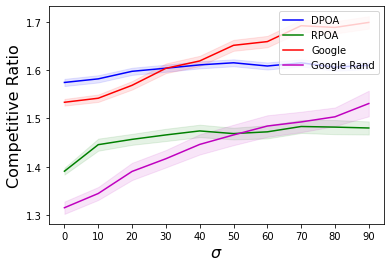

In [388]:
avg_ratio = np.mean(alg_ratio, axis=1)
ci = 1.96 * np.std(alg_ratio,axis=1)/np.sqrt(repeat)
avg_r_ratio = np.mean(rand_ratio, axis=1)
ci_r = 1.96 * np.std(rand_ratio,axis=1)/np.sqrt(repeat)
avg_ratio_g = np.mean(google_ratio, axis=1)
ci_g = 1.96 * np.std(google_ratio,axis=1)/np.sqrt(repeat)
avg_ratio_gr = np.mean(google_r_ratio, axis=1)
ci_gr = 1.96 * np.std(google_r_ratio,axis=1)/np.sqrt(repeat)

plt.clf()
# plt.boxplot(alg_ratio.transpose(), "DPOA")
# plt.boxplot(google_ratio.transpose(), "Google");

positions = np.arange(1, len(std_list)+1)

plt.plot(positions, avg_ratio, label="DPOA", color='b')
plt.fill_between(positions, (avg_ratio-ci), (avg_ratio+ci), color='b', alpha=.1)

plt.plot(positions, avg_r_ratio, label="RPOA", color='g')
plt.fill_between(positions, (avg_r_ratio-ci_r), (avg_r_ratio+ci_r), color='g', alpha=.1)


plt.plot(positions, avg_ratio_g, label="Google", color='r')
plt.fill_between(positions, (avg_ratio_g-ci_g), (avg_ratio_g+ci_g), color='r', alpha=.1)

plt.plot(positions, avg_ratio_gr, label="Google Rand", color='m')
plt.fill_between(positions, (avg_ratio_gr-ci_gr), (avg_ratio_gr+ci_gr), color='m', alpha=.1)


formated_list = ['%d' % elem for elem in std_list ]
plt.xticks(positions, formated_list);

plt.legend(loc='upper right')
plt.xlabel("$\sigma$", fontsize=16)
plt.ylabel("Competitive Ratio", fontsize=16)